# Introduction

In this notebook we will set out to learn about networks and graphs to quantify the most central papers and authors in High Energy Physics (HEP), as obtained from InspireHEP - a great HEP database. You can download its entire database of papers' metadata, which goes back to 1962 or so.

Naively, if you had to guess in a hurry, you'd say "But of course, it must be a paper by Steven Weinberg!", who is a Nobel Prize winner for the formulation of the Standard Model of particle physics. Or perhaps you'd guess "a paper by Edward Witten!", a string theorist, who's one of the smartest people that's ever lived. 

Here are their formidable paper and citation overall statistics, for example:

Weinberg: http://inspirehep.net/author/profile/S.Weinberg.1

Witten: http://inspirehep.net/author/profile/E.Witten.1

Let's first try to quantify this by using PageRank link analysis. As time goes on, we may try other notions of centrality. In a nutshell, pagerank centrality gives higher weights to nodes who have been endorsed by a large number of nodes, who in turn have been endorsed by many others, and so on.

In our case, we'll let nodes -> papers.
So, if paper i has a citation to paper j, then the directed edge (i,j) is established.

Before we get started, there are a few things we foresee we'll have to deal with.
One is that you find both theoretical and experimental papers on InspireHEP. There are crucial differences between theoretical and experimental papers. For one, experimental papers tend to have a lot of authors, whereas most theory papers have N <=4 papers or so. 

For example: Maldacena's (theorist) paper on AdS/CFT has 12000+ citations. It's a single author paper.
$$~$$
![Maldacena](figs/Maldacena.png)
$$~$$
$$~$$

On the other hand, here's an example of an experimental paper, by the ATLAS collaboration on the discovery of the Higgs particle:

$$~$$
![ATLAS](figs/ATLAS.png)
$$~$$
$$~$$

ATLAS lists some several thousand authors in their papers, and they publish a lot of papers (interesting analyses though, of course!).

So we may have to account for this somewhat if we want to assign rankings to authors. But first, let's focus on the PageRank of papers.

Note: while working on this project as a fun way to learn about Networks, I came across this very interesting paper https://arxiv.org/pdf/physics/0604130.pdf, which to my knowledge were the first to apply PageRank to scientific papers. They focus on papers published on the Physical Review journal from 1893 to 2003 or so.

Ok, now let's get started

# Papers PageRank

In [1]:
import json
from dateutil.parser import parse
import networkx as nx
import pandas as pd
%matplotlib inline
import matplotlib
matplotlib.style.use('fivethirtyeight')
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['font.family'] = 'sans-serif'
from collections import Counter, defaultdict
from __future__ import division
import datetime
from my_utils import is_bad_publication, compute_graph

We have collected the metadata from InspireHEP.
You can download a zipped file from https://inspirehep.net/info/hep/api. It's in JSON format, which is pretty readable in python. The typical paper entry is a python dict, with the following keys:

[u'free_keywords',
 u'title',
 u'abstract',
 u'co-authors',
 u'creation_date',
 u'standardized_keywords',
 u'citations',
 u'recid',
 u'authors',
 u'references']
 
 We'll build directed edges in a network, whose nodes are papers.
 That is, edges of the form (paper that cites, paper that's cited) 


Let's perform a bit of cleaning.
We want:

1. Get rid of proceedings or theses, and of any papers that have been withdrawn or canceled.
2. Get rid of papers that have 0 references. Why? Because no reputable paper would have zero references in it.
3. Similarly, let's get rid of papers that have 0 citations. There are more than 1 million nodes in the network, so at most these papers would endow PageRanks at the level of 10$^{-6}/N_{\rm{ref}}$ level, where $N_{\rm{ref}}$ is the number of references of that paper. More importantly, by making this restriction, we are choosing to include papers that already have earned *some* PageRank, to make the computation faster.
4. Also get rid of papers that for some reason don't list any authors.
2. We may want to select only papers within a certain date period, if the dataset is still too large.

Let's read the data and clean it by "brute force" here. Later on we'll do it using pandas.

In [2]:
# let's read the data and clean it by "brute force" (i.e. not with pandas)

DG = nx.DiGraph() # directed graph. Edges are (paper that cites, paper that's cited)
authors_in_recid = defaultdict(list) # key is recid, value is author list of recid
citations_by_recid = defaultdict(int)
citations = []
recids = []
authors = []
json_path = '/Users/ederizaguirre/Research/FunProjects/InspireHEPNetworks/'

with open(json_path+'hep_records.json') as f:
    list(map(lambda x: compute_graph(DG, authors_in_recid, citations_by_recid, x), 
             f.readlines()))


In [6]:
len(authors_in_recid)

644925

In [4]:
pr_by_recid = nx.pagerank(DG) # calculate the pagerank

In [5]:
# let's sort the entries
pr_by_recid_sorted = sorted(pr_by_recid.items(), key=lambda x: x[1], reverse=True)

In [6]:
len(pr_by_recid_sorted) #number of papers that have been cited

919603

In [7]:
pr_by_recid_sorted[:10] # the 10 papers with the highest pagerank

[(51188, 0.0007670786596215794),
 (89145, 0.000434722248555388),
 (81350, 0.0004000397520646419),
 (593382, 0.00037636707550860236),
 (101338, 0.00036552407466304424),
 (451647, 0.000354047967696729),
 (60999, 0.0003461287872615622),
 (81238, 0.0003377737111926156),
 (81406, 0.00033727125620542454),
 (53083, 0.00033516330689920085)]

Which papers are these?

Here's the InspireHEP entry for the paper with the highest pagerank:

![Weinberg](figs/Weinberg.png)
$$~$$
$$~$$

Steven Weinberg's paper where he formulated the Standard Model of Particle Physics! This paper got him a Nobel Prize in 1979, so not too shabby.



And the paper with the second-most pagerank is:

![Wilson](figs/Wilson.png)
$$~$$
$$~$$



Ken Wilson's paper on the confinement of quarks! While this paper did not lead to a Nobel Prize per se, Wilson did win a Nobel Prize for something else (his work on critical phenomena in connection with phase transitions). In any case, his work on quark confinement is supremely important as well.

Ok, one more. How about the bronze medal? This goes to

![KM](figs/KobayashiMaskawa.png)
$$~$$
$$~$$
Kobayashi and Maskawa's paper which got them the 2008 Nobel Prize! (Along with Nambu).


Interestingly, these are not the *most* cited papers. We saw the example of Maldacena's paper earlier, which is cited a lot more often. That being said, Maldacena's paper is in the top 10.
For completeness, let's see what the first few top cited papers are.


In [8]:
# citations by recid sorted
citations_by_recid_sorted = sorted(citations_by_recid.items(),
                                  key = lambda x: x[1], reverse = True)

In [9]:
citations_by_recid_sorted[:10]

[(451647, 12812),
 (51188, 10698),
 (484837, 10138),
 (470671, 9932),
 (81350, 9097),
 (712925, 8671),
 (467400, 8409),
 (613135, 8165),
 (593382, 7867),
 (499284, 7539)]

The top 3 are:
1. Maldacena's paper from above.
$$~$$
2. Weinberg's paper.
$$~$$
3. The Nobel Prize winning work by Perlmutter's team:
$$~$$
![Supernova.png](figs/Supernova.png)
$$~$$
$$~$$

Now, it seems that the top 10 PageRank papers are definitely worthy of that ranking. But PageRank does seem to capture something different. In particular, Wilson's paper seems to be quite an outlier.


Before we move on to a PageRank-based metric for authors, let's save the PageRank results to a file!

In [8]:
with open('data/recid_pr_damping0p85.dat','w') as f:
    for recid_i, pr_i in pr_by_recid_sorted:
        f.write(str(recid_i) + '\t' + str(pr_i) + '\n')

# Authors PageRank-based Impact

Let's try to quantify the rankings of authors' centrality, based on the pageranks of their papers.
We will try two different ways of assigning pagerank.
First, we will assign a paper's pagerank to each one of its authors. In this approach, pagerank is not conserved.
Second, we will try a more sensible approach, where we assume that pagerank is a conserved quantity, so we endow each of the authors of a paper with $pr/N$ where $pr$ is that paper's pagerank, and $N$ is the number of authors.

## (Bad) Approach 1: Each Author Gets All of Paper's PageRank

In [12]:
# let's build the cumulative authors' PageRannk-based measure

pr_by_author = defaultdict(float) # key is author, value is author's total PR 

for recid_i,authors_i in authors_in_recid.iteritems():
    for author_i in authors_i:
        pr_by_author[author_i] += pr_by_recid[recid_i]

pr_by_author_sorted = sorted(pr_by_author.items(), 
                             key=lambda x: x[1], reverse=True)

Ok, let's see who the first few authors are. Let's make some plots!

In [ ]:
num_entries = 30

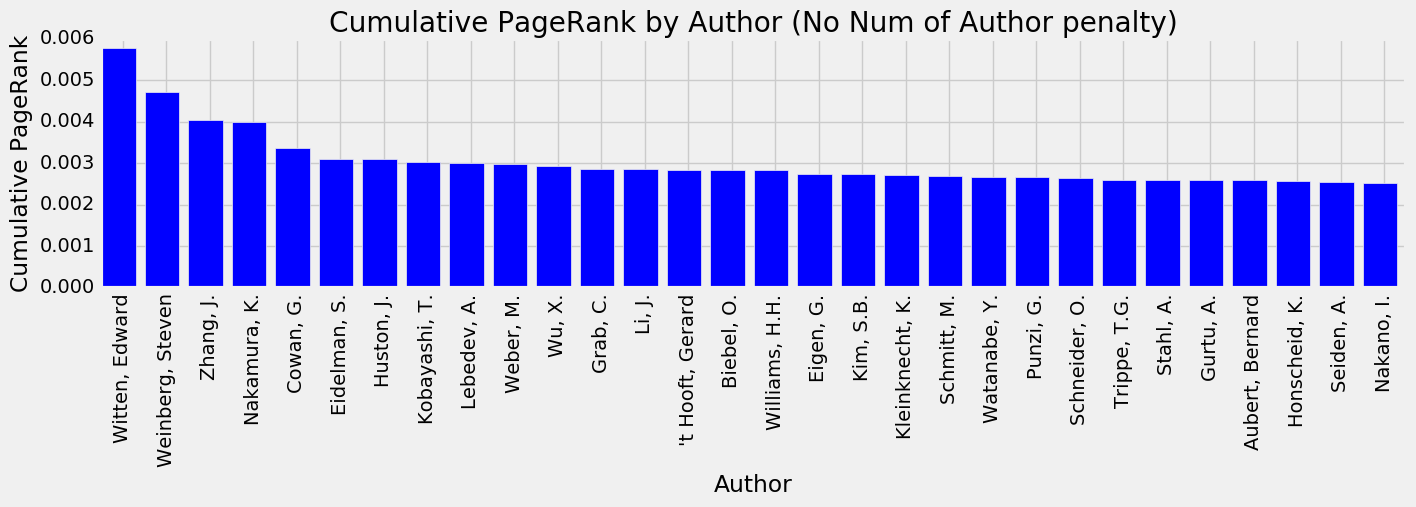

In [14]:
cumu_pr = [pr_i 
           for _, pr_i in pr_by_author_sorted[:num_entries]]

x_ticks_labels = [author_i 
                  for author_i, _ in pr_by_author_sorted[:num_entries]]

x=range(num_entries)

plt.bar(x,cumu_pr)
plt.ylabel("Cumulative PageRank")
plt.xlabel("Author")
plt.title("Cumulative PageRank by Author (No Num of Author penalty)")
plt.xticks([i+0.5 for i,_ in enumerate(cumu_pr)],x_ticks_labels,rotation='vertical')
plt.show()

So, many of the authors in that plot belong to experimental collaborations.
It's sort of amazing that Ed Witten comes out on top in this scenario, but of course, not surprising!

Let's compute the authors' cumulative page rank again, but this time we will assume that each paper's page rank is equally divided amongst its authors. Now, we expect that famous theorists will top the chart. Let's find out!

## Approach 2: PageRank is Divided Equally Amongst a Paper's Authors

In [15]:
# let's build the cumulative authors' PageRannk-based measure

pr_by_author_with_linpen = defaultdict(float) # key is author, value is author's total PR 

for recid_i, authors_i in authors_in_recid.iteritems():
    for author_i in authors_i:
        pr_by_author_with_linpen[author_i] += pr_by_recid[recid_i]/len(authors_i)

pr_by_author_with_linpen_sorted = sorted(pr_by_author_with_linpen.items(), 
                                         key=lambda x: x[1],reverse=True)

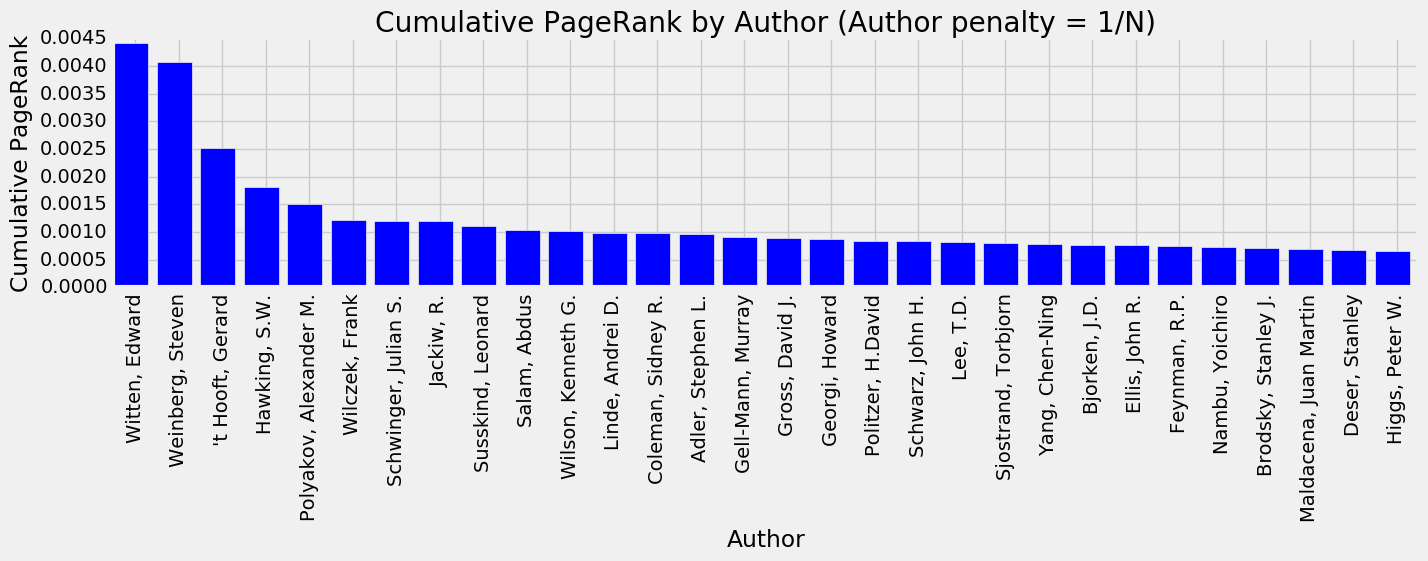

In [16]:
cumu_pr = [pr_i 
           for _, pr_i in pr_by_author_with_linpen_sorted[:num_entries]]

x_ticks_labels = [author_i 
                  for author_i,_ in pr_by_author_with_linpen_sorted[:num_entries]]

x = range(num_entries)

plt.bar(x,cumu_pr)
plt.ylabel("Cumulative PageRank")
plt.xlabel("Author")
plt.title("Cumulative PageRank by Author (Author penalty = 1/N)")
plt.xticks([i+0.5 for i,_ in enumerate(cumu_pr)],x_ticks_labels,rotation='vertical')
plt.show()

Ok, so now we see the list is populated by some really larger than life people.
Note that this isn't fair to Feynman or to people who mostly published their best work before the 1960's since InspireHEP does not have such records. In fact, it's incredible that Feynman still shows up!

How about the top 30 by citation count?

In [3]:
# we need to build the num_cites_by_author dict and sorted list
num_entries = 30
num_cites_by_author = defaultdict(int) # key is author; value is total citation count

for recid_i, authors_i in authors_in_recid.iteritems():
    for author in authors_i:
        num_cites_by_author[author] += citations_by_recid[recid_i]
    
num_cites_by_author_sorted = sorted(num_cites_by_author.items(), 
                                    key = lambda x: x[1], reverse = True)

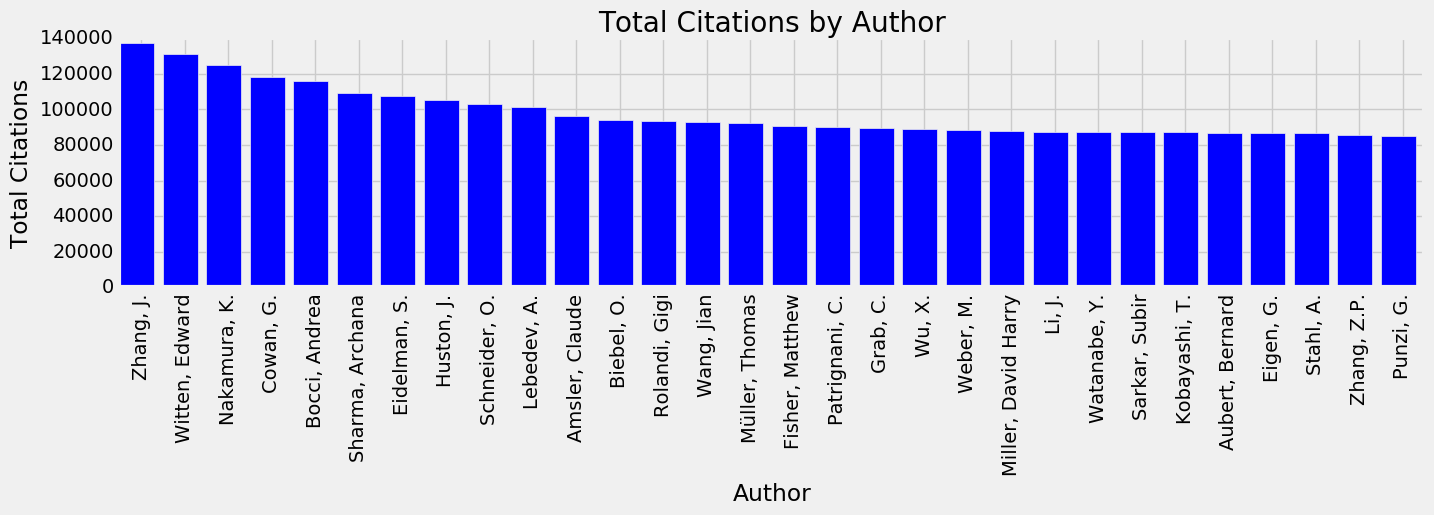

In [6]:
cumu_cites = [cite_i 
              for _, cite_i in num_cites_by_author_sorted[:num_entries]]

x_ticks_labels = [author_i 
                  for author_i,_ in num_cites_by_author_sorted[:num_entries]]

x = range(num_entries)

plt.bar(x,cumu_cites)
plt.ylabel("Total Citations")
plt.xlabel("Author")
plt.title("Total Citations by Author")
plt.xticks([i+0.5 for i,_ in enumerate(cumu_cites)],x_ticks_labels,rotation='vertical')
plt.show()

Now, a lot of the top cite authors belong to experimental collaborations!
None of the authors in the plot above are Nobel Prize winners.

## Varying the Damping Factor

In our building of a graph and computing the PageRank of the nodes in the network, we have used the default value of $\alpha=0.85$, where $\alpha$ is the damping factor. Its interpretation roughly corresponds to the probability that a random user in the network will stop at the current website (paper) instead of continuing to click on a random hyperlink (reference) on the current paper. While that may be appropriate for the case of google searches and a user randomly clicking on links until they get tired, should that hold for papers?

From personal experience (and witnessing my collaborators), I think the average person goes as far as one or two layers down in chasing down references. So, while this is far from a scientific study on the optimal value of $\alpha$, in this case, let us postulate now that the user stops at step N = 2. So the damping factor is $\alpha=0.5$. This is also the same value used by https://arxiv.org/pdf/physics/0604130.pdf. 

So, let's just see how our results are affected by this. Let's only do it for the case where the PageRank is divided equally amongst the authors of a paper.

In [17]:
pr_by_recid_alpha0p5 = nx.pagerank(DG,alpha=0.5) # calculate the pagerank for different damping factor

In [21]:
#let's sort the entries
pr_by_recid_alpha0p5_sorted = sorted(pr_by_recid_alpha0p5.items(),
                                     key=lambda x: x[1], reverse=True) 

In [22]:
pr_by_recid_alpha0p5_sorted[:10] # print the first 10 papers again

[(796888, 0.0004202973149178879),
 (593382, 0.00034968170263134125),
 (51188, 0.0002840191500940265),
 (796887, 0.000261296434682154),
 (451647, 0.00021230805733054512),
 (81350, 0.00020909102984453253),
 (712925, 0.00018421433857041133),
 (484837, 0.0001819859166635316),
 (101338, 0.00017995414550903073),
 (470671, 0.00017231154131034821)]

Ok, things look a bit different now. The top-ranked paper is now:

![ATLAS](figs/ATLAS.png)
$$~$$
$$~$$
The standard citation for the ATLAS experiment, one of the two general purpose experiments at the Large Hadron Collider!

Second place:
$$~$$
![Geant4](figs/Geant4.png)
$$~$$
$$~$$
The GEANT4 standard citation paper. GEANT4 is a ubiquotous simulation program in particle physics.

How about third place? We recognize the recid of the third paper. It's the Standard Model paper by Weinberg!

Ok, so things changed a bit when changing the damping factor. In particular, some of the top papers are newer papers than before. It could be that this smaller damping factor effectively captures the fact that some of the classic papers like 2) from before by Wilson are not easily reachable if you stop chasing references after the second step.

From now on, I will use the default damping factor of 0.85. I think it is a meaningful statement that some papers may be so central that if you keep chasing references down enough times (i.e. on average at most 6 times for alpha = 0.85), you tend to hit on those papers. Note that my statement above is speculation at this point. I will return to this subject at later point though!

In [23]:
# Let's save the PageRank for alpha=0.5 for future purposes
with open('data/recid_pr_damping0p5.dat','w') as f:
    for recid_i, pr_i in pr_by_recid_alpha0p5_sorted:
        f.write(str(recid_i) + '\t' + str(pr_i) + '\n')

In [24]:
# let's build the cumulative authors' PageRank-based measure

pr_by_author_alpha0p5_with_linpen = defaultdict(float) # key is author, value is author's total PR 

for recid_i, authors_i in authors_in_recid.iteritems():
    for author_i in authors_i:
        pr_by_author_alpha0p5_with_linpen[author_i] += pr_by_recid_alpha0p5[recid_i]/len(authors_i)

pr_by_author_alpha0p5_with_linpen_sorted = sorted(pr_by_author_alpha0p5_with_linpen.items(),
                                                  key=lambda x: x[1],reverse=True)

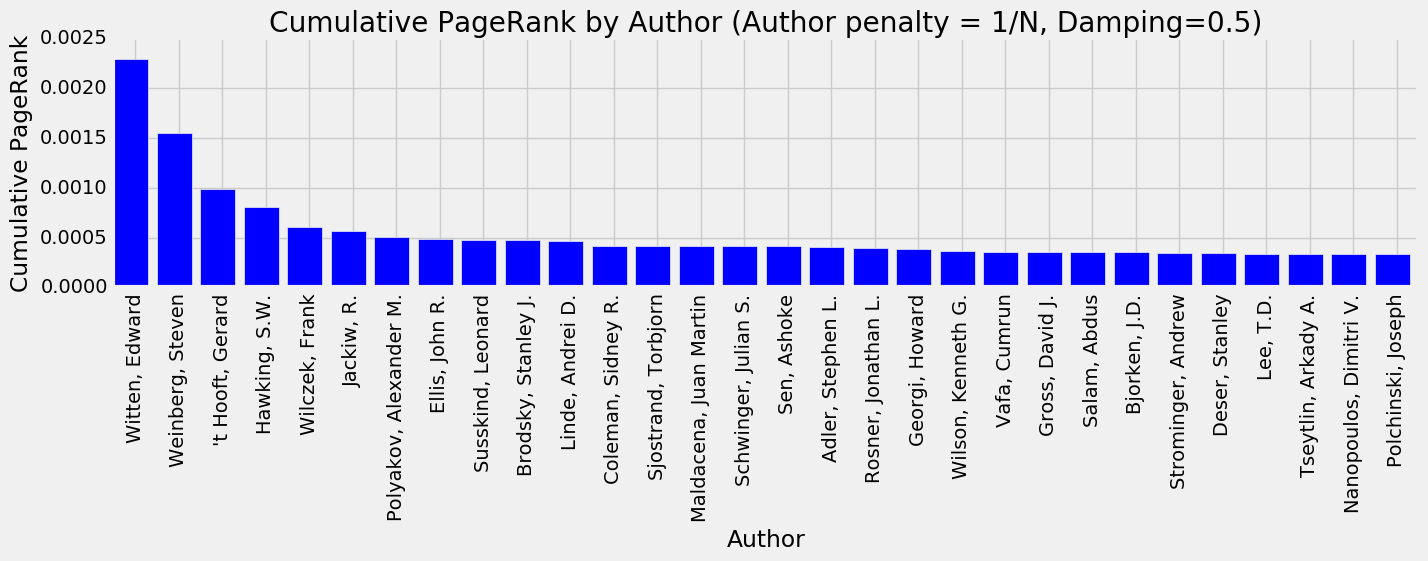

In [25]:
cumu_pr = [pr_i 
           for _, pr_i in pr_by_author_alpha0p5_with_linpen_sorted[:num_entries]]

x_ticks_labels = [author_i 
                  for author_i, _ in pr_by_author_alpha0p5_with_linpen_sorted[:num_entries]]

x = range(num_entries)

plt.bar(x,cumu_pr)
plt.ylabel("Cumulative PageRank")
plt.xlabel("Author")
plt.title("Cumulative PageRank by Author (Author penalty = 1/N, Damping=0.5)")
plt.xticks([i+0.5 for i,_ in enumerate(cumu_pr)],x_ticks_labels,rotation='vertical')
plt.show()

Ok, some of the older-times authors like Schwinger or Higgs moved down in the rankings in favour of younger ones like Ellis or Polchinski. Overall though, every person on the list is a famous physicist.

## What's Next?

Ok, we have computed the PageRank of the papers on InspireHEP. The database provides metadata going back to the mid 1960's or so. We could of course go on to ask other interesting questions like:

1. Is citation-count correlated with an author's pagerank-based ranking?

2. Is h-index correlated with an author's pagerank-based ranking?

3. Do people tend to overcite today compared to, say, in the 1970's?

4. Do papers that cite a lot of other papers tend to get less citations? My hunch tells me that there might be an (anti) correlation here.

5. The more interesting question. Can we find indicators and learn them from data to predict future high PageRank authors?

For now, let's just try to tackle 1).